# Linear Regression

## Data

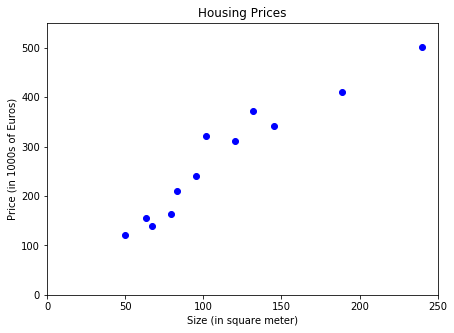

In [54]:
size = [50, 63, 67, 79, 
        83, 95, 102, 120, 
        132, 145, 189, 240]
price = [120, 155, 139, 164, 
         210, 240, 322, 312,
         371, 342, 410, 502]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_diagram():
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(size, price, c='blue')
    ax.set_ylabel("Price (in 1000s of Euros)")
    ax.set_xlabel("Size (in square meter)")
    ax.set_title("Housing Prices")
    ax.set_xlim(0, 250)
    ax.set_ylim(0, 550)
    return ax;
    
ax = plot_diagram()

## Hypothesis

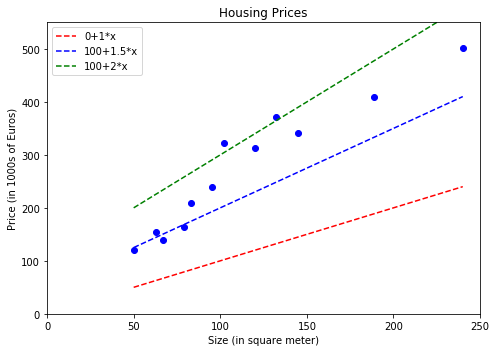

In [55]:
ax = plot_diagram()

ax.plot(size, list(map(lambda x : 0 + 1 * x, size)), 'r--', label='0+1*x')
ax.plot(size, list(map(lambda x : 50 + 1.5 * x, size)), 'b--', label='100+1.5*x')
ax.plot(size, list(map(lambda x : 100 + 2 * x, size)), 'g--', label='100+2*x')
    
ax.legend()
plt.tight_layout()

## Cost function for fixed a

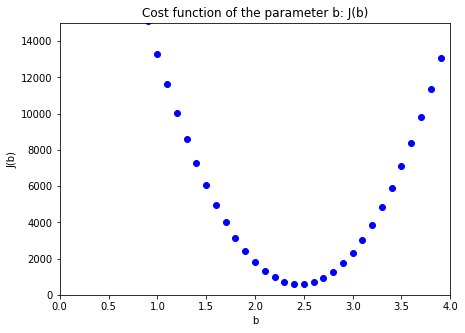

In [56]:
import numpy as np

def cost_function(a, b):
    m = 11
    square_error_sum = 0

    for i in range(0, m):
        x = size[i]
        y = price[i]

        h = a + b * x

        square_error_sum += (h-y) * (h-y)
    
    return 1 / (2 * m) * square_error_sum

b_values = np.arange(0, 4, 0.1)

cost_values = list(map(lambda b : cost_function(0, b), b_values))

def plot_cost_function():
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(b_values, cost_values, c='blue')
    ax.set_xlabel("b")

    ax.set_ylabel("J(b)")
    ax.set_title("Cost function of the parameter b: J(b)")
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 15000)
    return ax;
    
ax = plot_cost_function()


Contur plots

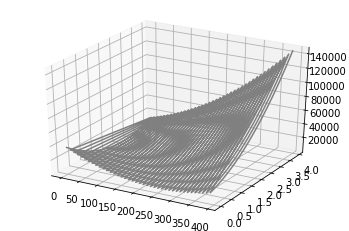

In [59]:
a_values = np.arange(0, 400, 10)
b_values = np.arange(0, 4, 0.1)

xline = []
yline = []
zline = []

for a in a_values:
    for b in b_values:
        xline.append(a)
        yline.append(b)
        zline.append(cost_function(a, b))
    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(xline, yline, zline, 'gray')






[[  0  10  20 ... 370 380 390]
 [  0  10  20 ... 370 380 390]
 [  0  10  20 ... 370 380 390]
 ...
 [  0  10  20 ... 370 380 390]
 [  0  10  20 ... 370 380 390]
 [  0  10  20 ... 370 380 390]]
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [3.7 3.7 3.7 ... 3.7 3.7 3.7]
 [3.8 3.8 3.8 ... 3.8 3.8 3.8]
 [3.9 3.9 3.9 ... 3.9 3.9 3.9]]


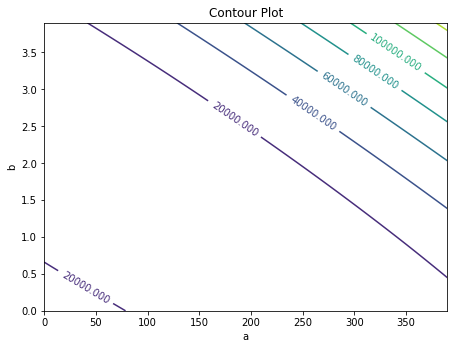

In [79]:
X, Y = np.meshgrid(a_values, b_values)
Z = cost_function(X, Y)

print(X)
print(Y)

fig = plt.figure(figsize=(7,5))

left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('a')
ax.set_ylabel('b')
plt.show()